# Installing Dependencies

In [1]:
!pip install hdbscan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 53.7 MB/s eta 0:00:00


# Import dataset and Library

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import hdbscan
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_absolute_error, r2_score

In [3]:
df = pd.read_csv("/kaggle/input/viral-social-media-trends-and-engagement-analysis/Viral_Social_Media_Trends.csv")
df.head()

,Post_ID,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
0,Post_1,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High
1,Post_2,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium
2,Post_3,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium
3,Post_4,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low
4,Post_5,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium


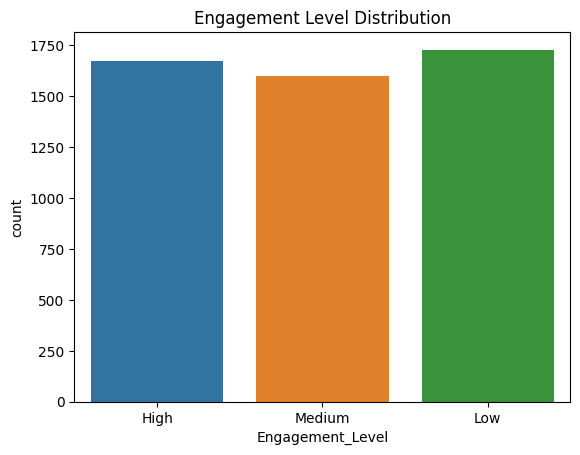

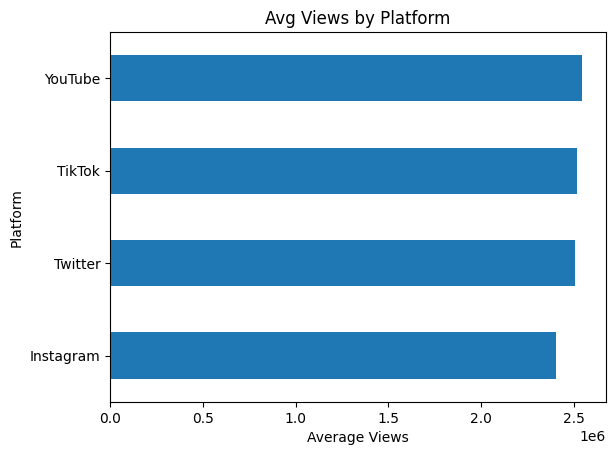

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Engagement level distribution
sns.countplot(data=df, x='Engagement_Level')
plt.title("Engagement Level Distribution")
plt.show()

# Average views by platform
df.groupby('Platform')['Views'].mean().sort_values().plot(kind='barh', title='Avg Views by Platform')
plt.xlabel('Average Views')
plt.show()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Post_ID           5000 non-null   object
 1   Platform          5000 non-null   object
 2   Hashtag           5000 non-null   object
 3   Content_Type      5000 non-null   object
 4   Region            5000 non-null   object
 5   Views             5000 non-null   int64 
 6   Likes             5000 non-null   int64 
 7   Shares            5000 non-null   int64 
 8   Comments          5000 non-null   int64 
 9   Engagement_Level  5000 non-null   object
dtypes: int64(4), object(6)
memory usage: 390.8+ KB


In [6]:
df.describe()

,Views,Likes,Shares,Comments
count,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,2.494066e+06,251475.029800,50519.562000,24888.393800
std,1.459490e+06,144349.583384,29066.362671,14284.504319
min,1.266000e+03,490.000000,52.000000,18.000000
25%,1.186207e+06,126892.250000,25029.000000,12305.250000
50%,2.497373e+06,249443.000000,50839.500000,25004.000000
75%,3.759781e+06,373970.750000,75774.250000,37072.750000
max,4.999430e+06,499922.000000,99978.000000,49993.000000


In [7]:
df.columns

Index(['Post_ID', 'Platform', 'Hashtag', 'Content_Type', 'Region', 'Views',
       'Likes', 'Shares', 'Comments', 'Engagement_Level'],
      dtype='object')

In [8]:
df["Platform"].value_counts()

Platform
YouTube      1324
TikTok       1260
Instagram    1212
Twitter      1204
Name: count, dtype: int64

In [9]:
df['Engagement_Level'].value_counts()

Engagement_Level
Low       1729
High      1673
Medium    1598
Name: count, dtype: int64

In [10]:
df.isnull().sum()

Post_ID             0
Platform            0
Hashtag             0
Content_Type        0
Region              0
Views               0
Likes               0
Shares              0
Comments            0
Engagement_Level    0
dtype: int64

In [11]:
df.duplicated().sum()

0

# EDA and Visual Analysis

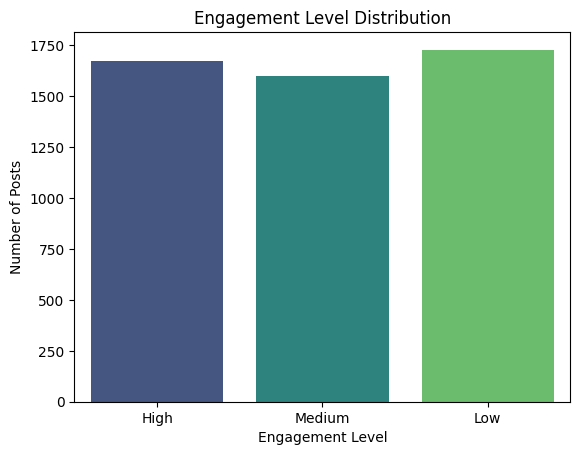

In [12]:
# Plot engagement level distribution
sns.countplot(data=df, x='Engagement_Level', palette='viridis')
plt.title("Engagement Level Distribution")
plt.xlabel("Engagement Level")
plt.ylabel("Number of Posts")
plt.show()


In [13]:
print(f"Number of High : {df['Engagement_Level'].value_counts().get('High', 0)}")
print(f"Number of Medium : {df['Engagement_Level'].value_counts().get('Medium', 0)}")
print(f"Number of Low : {df['Engagement_Level'].value_counts().get('Low', 0)}")

Number of High : 1673
Number of Medium : 1598
Number of Low : 1729


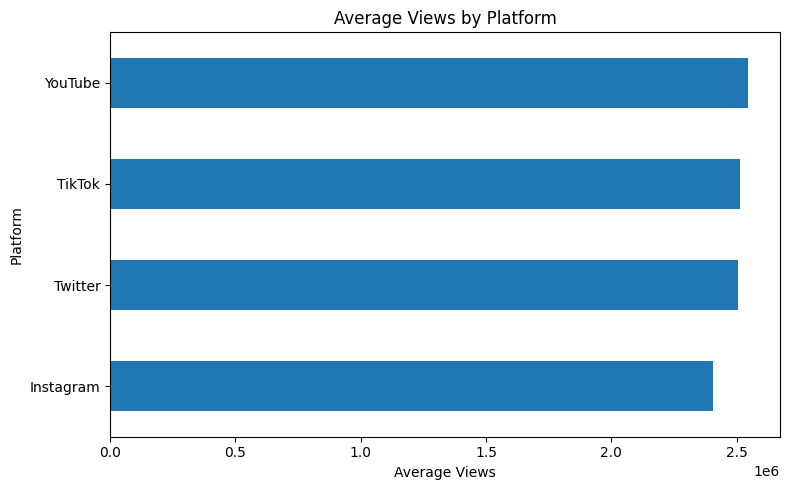

In [14]:
# Average views by platform
df.groupby('Platform')['Views'].mean().sort_values().plot(
    kind='barh',
    figsize=(8, 5),
    title='Average Views by Platform'
)
plt.xlabel('Average Views')
plt.ylabel('Platform')
plt.tight_layout()
plt.show()

In [15]:
viewsByPlat = df.groupby('Platform')['Views'].sum()
viewsByPlat

Platform
Instagram    2913744812
TikTok       3168919406
Twitter      3017229522
YouTube      3370438480
Name: Views, dtype: int64

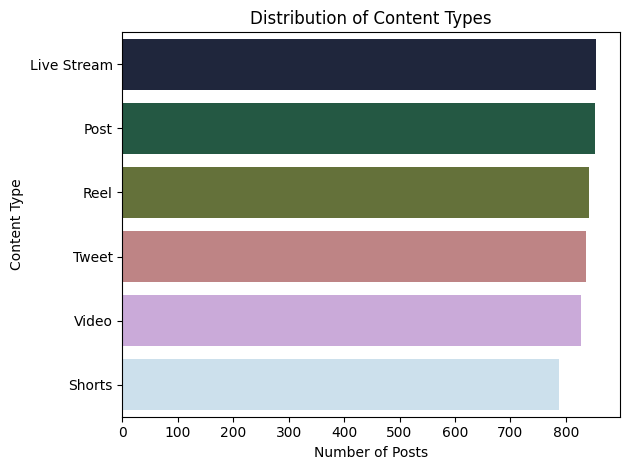

In [16]:
sns.countplot(data=df, y='Content_Type', order = df['Content_Type'].value_counts().index, 
              palette='cubehelix')
plt.title("Distribution of Content Types")
plt.xlabel("Number of Posts")
plt.ylabel("Content Type")
plt.tight_layout()
plt.show()

In [17]:
df['Content_Type'].value_counts()

Content_Type
Live Stream    855
Post           853
Reel           841
Tweet          836
Video          828
Shorts         787
Name: count, dtype: int64

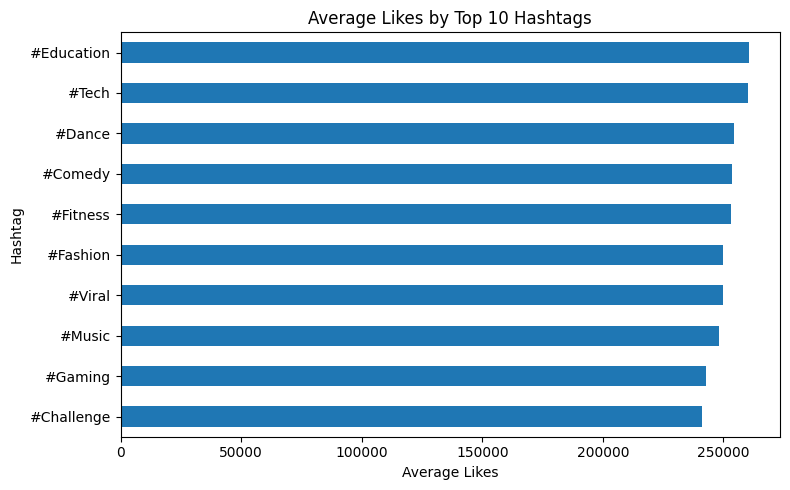

In [18]:
# Average likes by hashtag
top_hashtags = df['Hashtag'].value_counts().head(10).index
avg_likes_by_hashtag = df[df['Hashtag'].isin(top_hashtags)].groupby('Hashtag')['Likes'].mean().sort_values()

avg_likes_by_hashtag.plot(kind='barh', figsize=(8,5), title='Average Likes by Top 10 Hashtags')
plt.xlabel('Average Likes')
plt.ylabel('Hashtag')
plt.tight_layout()
plt.show()
#  top 10 only

In [19]:
# Get the top 10 most frequent hashtags
top10 = df['Hashtag'].value_counts().head(10).index
# Filter the DataFrame for the top 10 hashtags
top_hashtags_df = df[df['Hashtag'].isin(top10)]
# Group by 'Hashtag' and calculate the average likes for each hashtag
avgLikes = top_hashtags_df.groupby('Hashtag')['Likes'].mean().sort_values(ascending=False)
avgLikes

Hashtag
#Education    260423.419048
#Tech         260347.148676
#Dance        254484.889113
#Comedy       253615.746535
#Fitness      253130.125000
#Fashion      249970.577002
#Viral        249964.492723
#Music        248012.815416
#Gaming       242819.588727
#Challenge    241212.439842
Name: Likes, dtype: float64

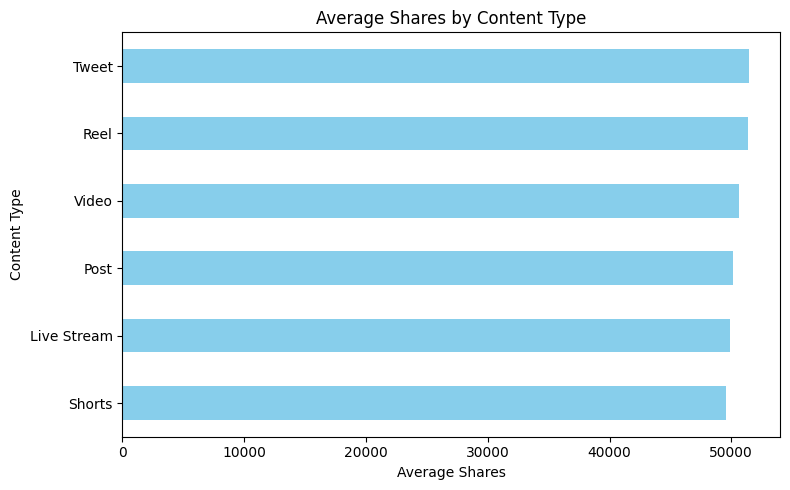

In [20]:
# Average shares by content type
avg_shares = df.groupby('Content_Type')['Shares'].mean().sort_values()

avg_shares.plot(kind='barh', figsize=(8,5), title='Average Shares by Content Type', color='skyblue')
plt.xlabel('Average Shares')
plt.ylabel('Content Type')
plt.tight_layout()
plt.show()

In [21]:
avg_shares = df.groupby('Content_Type')['Shares'].mean().sort_values(ascending=False)
avg_shares

Content_Type
Tweet          51427.454545
Reel           51357.868014
Video          50614.386473
Post           50164.198124
Live Stream    49921.960234
Shorts         49593.954257
Name: Shares, dtype: float64

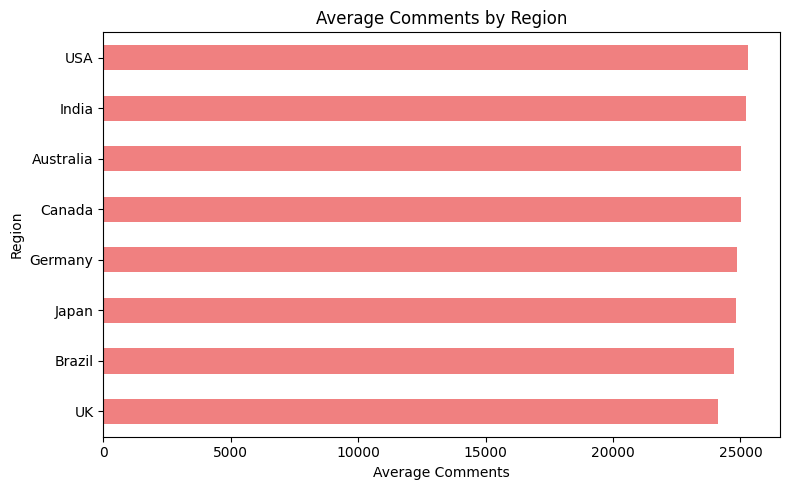

In [22]:
avg_comments_by_region = df.groupby('Region')['Comments'].mean().sort_values()
avg_comments_by_region.plot(kind='barh', figsize=(8,5), 
                            title='Average Comments by Region', color='lightcoral')
plt.xlabel('Average Comments')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

In [23]:
avg_comments_by_region = df.groupby('Region')['Comments'].mean().sort_values(ascending=False)
avg_comments_by_region

Region
USA          25286.499261
India        25227.580227
Australia    25025.559801
Canada       25015.653495
Germany      24850.975265
Japan        24829.773649
Brazil       24754.538222
UK           24110.306028
Name: Comments, dtype: float64

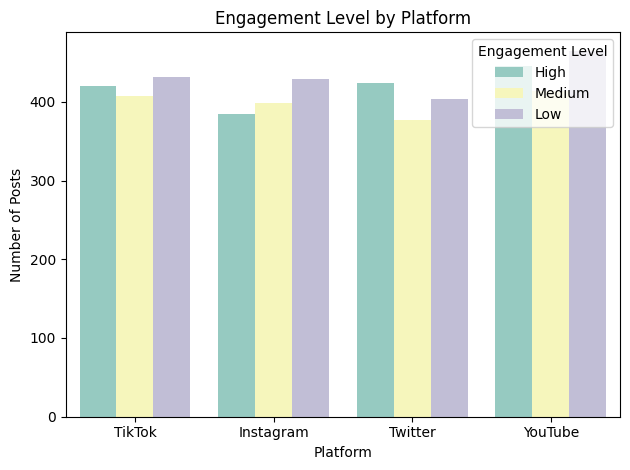

In [24]:
# Engagement level distribution across platforms
sns.countplot(data=df, x='Platform', hue='Engagement_Level', palette='Set3')
plt.title("Engagement Level by Platform")
plt.xlabel("Platform")
plt.ylabel("Number of Posts")
plt.legend(title='Engagement Level')
plt.tight_layout()
plt.show()

In [25]:
counts = df.groupby(['Platform', 'Engagement_Level']).size() #.reset_index(name='Post_Count')
counts

Platform   Engagement_Level
Instagram  High                384
           Low                 429
           Medium              399
TikTok     High                420
           Low                 432
           Medium              408
Twitter    High                424
           Low                 403
           Medium              377
YouTube    High                445
           Low                 465
           Medium              414
dtype: int64

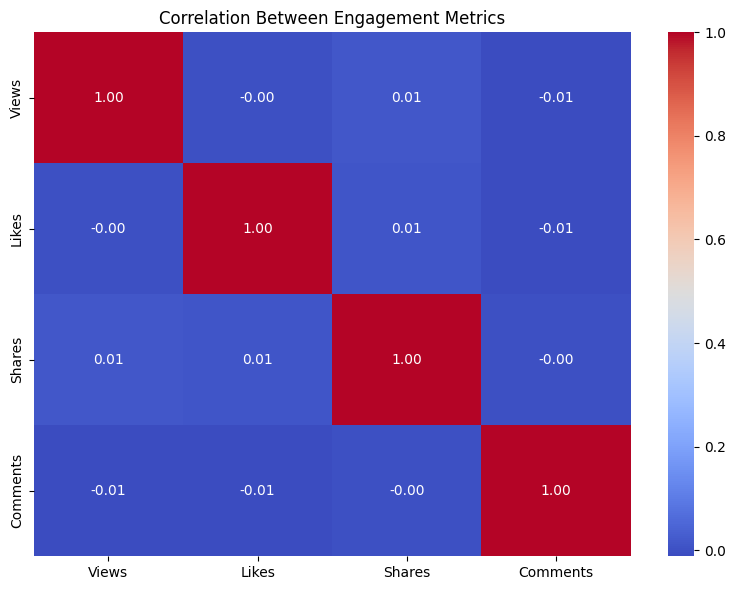

In [26]:
# Correlation heatmap of numeric engagement metrics
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(df[['Views', 'Likes', 'Shares', 'Comments']].corr(), 
            annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Between Engagement Metrics")
plt.tight_layout()
plt.show()

<Axes: xlabel='Engagement_Level', ylabel='Likes'>

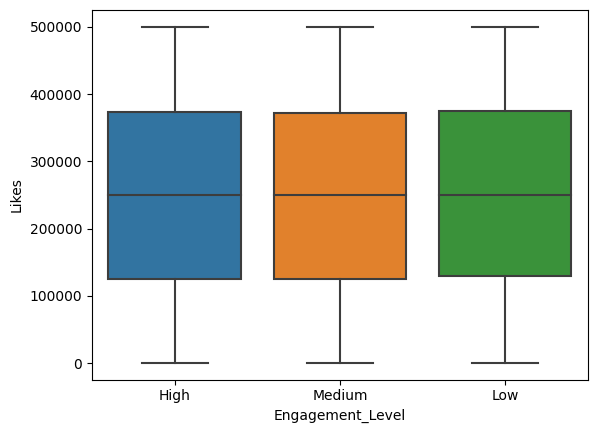

In [27]:
sns.boxplot(data=df, x='Engagement_Level', y='Likes')

- **The boxplot shows that the distribution of likes is pretty similar across all three engagement levels**

# Classification — Predicting EngagementLevel

I will predict the engagement level (Low, Medium, High) based on:
- Views
- Likes
- Shares
- Comments

## Prepare Data & Split

In [28]:
# Features and target
X = df[['Views', 'Likes', 'Shares', 'Comments']]
y = df['Engagement_Level']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((4000, 4), (1000, 4))

In [29]:
# Initialize and train the model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluate the Model

In [30]:
y_pred = clf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.329

Classification Report:
               precision    recall  f1-score   support

        High       0.32      0.31      0.31       349
         Low       0.35      0.40      0.37       334
      Medium       0.31      0.28      0.30       317

    accuracy                           0.33      1000
   macro avg       0.33      0.33      0.33      1000
weighted avg       0.33      0.33      0.33      1000



# Regression

## Prepare Model

In [31]:
# Features and target
X_reg = df[['Views', 'Shares', 'Comments']]
y_reg = df['Likes']

# Train-test split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

X_train_reg.shape, X_test_reg.shape

((4000, 3), (1000, 3))

In [32]:
# Initialize and train the model
reg = RandomForestRegressor(random_state=42)
reg.fit(X_train_reg, y_train_reg)

RandomForestRegressor(random_state=42)

## Evaluate model

In [33]:
y_pred_reg = reg.predict(X_test_reg)

# Evaluate
mae = mean_absolute_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print("Mean Absolute Error:", mae)
print("R² Score:", r2)

Mean Absolute Error: 127475.81641
R² Score: -0.09408569977938752


# Clustering — Group Similar Posts
## Prepare data for clustering

In [34]:
# Select numeric features
features = df[['Views', 'Likes', 'Shares', 'Comments']]
# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

##  Elbow Method to Choose k

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

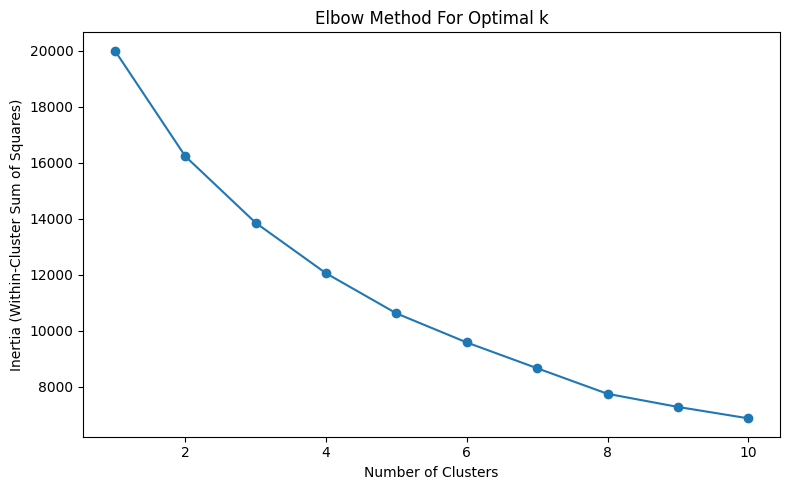

In [35]:
# k from 1 to 10
inertia = []
k_range = range(1, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_features)
    inertia.append(km.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.tight_layout()
plt.show()

In [36]:
# Run KMeans with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Preview with cluster labels
df[['Views', 'Likes', 'Shares', 'Comments', 'Cluster']].head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Views,Likes,Shares,Comments,Cluster
0,4163464,339431,53135,19346,1
1,4155940,215240,65860,27239,0
2,3666211,327143,39423,36223,1
3,917951,127125,11687,36806,2
4,64866,171361,69581,6376,3


In [37]:
# Cluster summary
cluster_summary = df.groupby('Cluster')[['Views', 'Likes', 'Shares', 'Comments']].mean()
cluster_summary

,Views,Likes,Shares,Comments
Cluster,,,,
0,3.555720e+06,141820.457547,69850.118711,25702.130503
1,3.529842e+06,374652.832389,33653.794332,23438.394332
2,1.540490e+06,158084.998472,26415.086325,25130.989305
3,1.327364e+06,344045.621622,73993.813345,25258.426520


## Cluster Summary

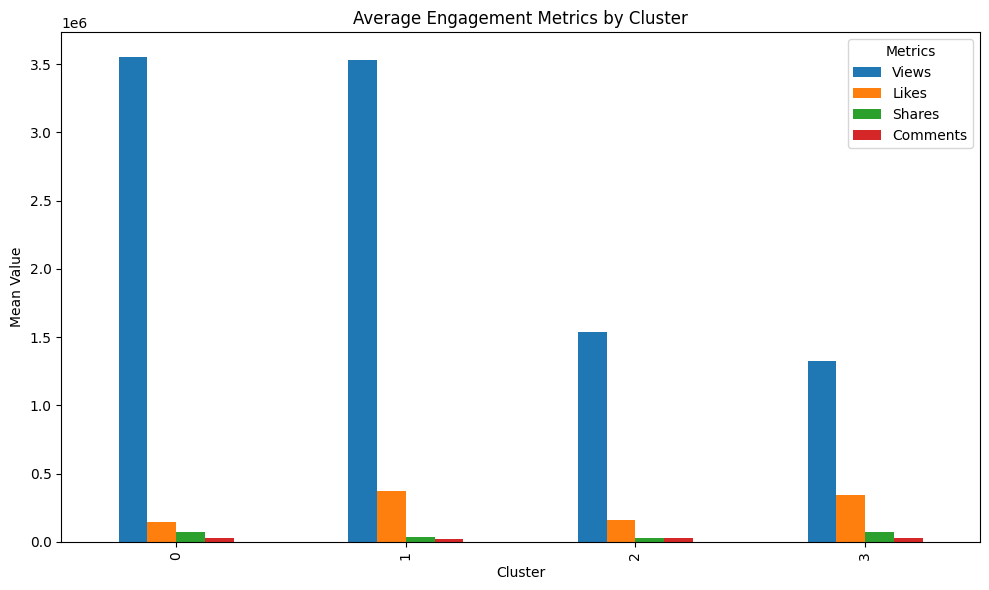

In [38]:
# Visualize average metrics per cluster
import matplotlib.pyplot as plt

cluster_summary = df.groupby('Cluster')[['Views', 'Likes', 'Shares', 'Comments']].mean()

cluster_summary.plot(kind='bar', figsize=(10,6))
plt.title("Average Engagement Metrics by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Mean Value")
plt.legend(title="Metrics")
plt.tight_layout()
plt.show()

In [39]:
# # Define cluster labels
# cluster_labels = {
#     0: 'Viral Reachers',
#     1: 'Highly Liked',
#     2: 'Average Performers',
#     3: 'Niche Hits'
# }

# # Create a new column with human-readable labels
# df['Cluster_Label'] = df['Cluster'].map(cluster_labels)

# # Preview
# df[['Cluster', 'Cluster_Label']].head()

In [40]:
# # Summary stats per labeled cluster
# cluster_summary_labeled = df.groupby('Cluster_Label')[['Views', 'Likes', 'Shares', 'Comments']].mean()
# cluster_sizes = df['Cluster_Label'].value_counts()

# # Combine into a single summary table
# summary = cluster_summary_labeled.copy()
# summary['Num_Posts'] = cluster_sizes
# summary = summary.reset_index()

# import pandas as pd
# from IPython.display import display
# display(summary)

In [41]:
from sklearn.metrics import silhouette_score

# fitted KMeans with k=4
sil_kmeans = silhouette_score(scaled_features, df['Cluster'])
print("Silhouette Score (KMeans):", sil_kmeans)

Silhouette Score (KMeans): 0.19562287675515397


Number of clusters: 2
Noise points (-1): 33


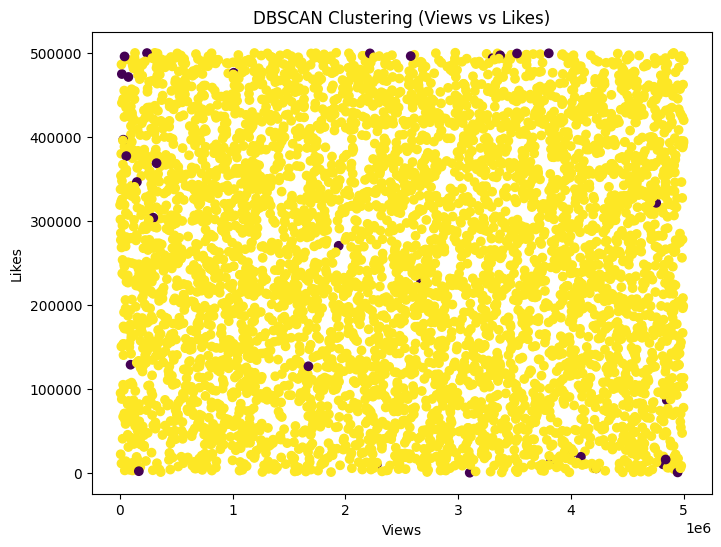

In [42]:
# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_features)

# Count number of clusters and noise points
print("Number of clusters:", len(set(df['DBSCAN_Cluster'])) - (1 if -1 in df['DBSCAN_Cluster'] else 0))
print("Noise points (-1):", list(df['DBSCAN_Cluster']).count(-1))

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['Views'], df['Likes'], c=df['DBSCAN_Cluster'], cmap='viridis', marker='o')
plt.title('DBSCAN Clustering (Views vs Likes)')
plt.xlabel('Views')
plt.ylabel('Likes')
plt.show()

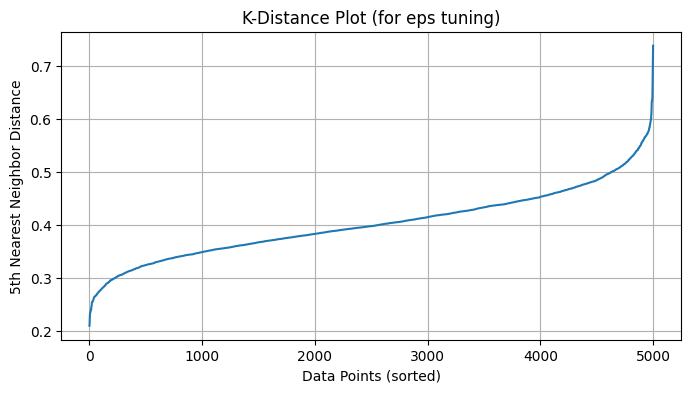

In [43]:
# Plotting k-distance graph for picking eps
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(scaled_features)
distances, indices = neighbors_fit.kneighbors(scaled_features)

# Sorting and ploting distances
distances = np.sort(distances[:, 4])

plt.figure(figsize=(8, 4))
plt.plot(distances)
plt.title("K-Distance Plot (for eps tuning)")
plt.ylabel("5th Nearest Neighbor Distance")
plt.xlabel("Data Points (sorted)")
plt.grid(True)
plt.show()


In [44]:
# with tuned eps
dbscan = DBSCAN(eps=0.55, min_samples=5)
df['DBSCAN_Tuned'] = dbscan.fit_predict(scaled_features)

# Checking results
print("Clusters:", len(set(df['DBSCAN_Tuned'])) - (1 if -1 in df['DBSCAN_Tuned'] else 0))
print("Noise points:", list(df['DBSCAN_Tuned']).count(-1))

Clusters: 2
Noise points: 4


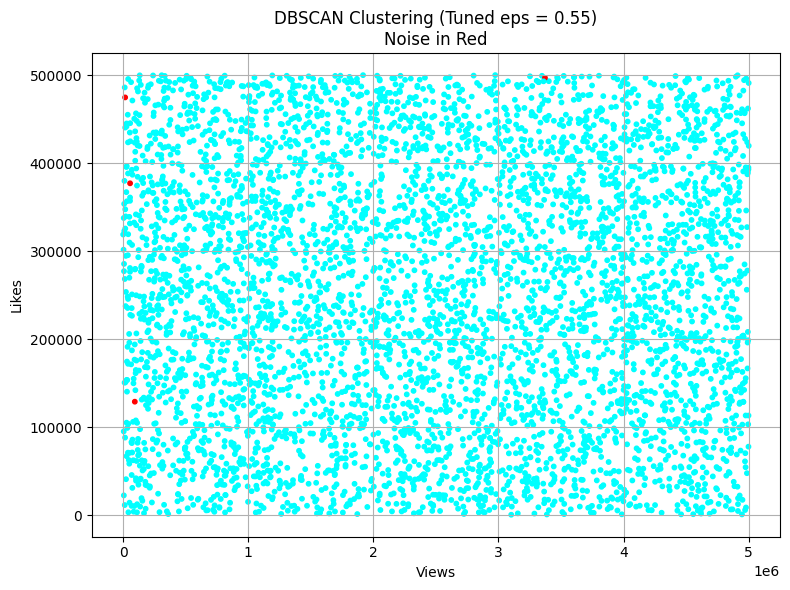

In [45]:
# Improved DBSCAN visualization which highlights noise
plt.figure(figsize=(8, 6))
colors = ['cyan' if label != -1 else 'red' for label in df['DBSCAN_Tuned']]
plt.scatter(df['Views'], df['Likes'], c=colors, s=10)
plt.title('DBSCAN Clustering (Tuned eps = 0.55)\nNoise in Red')
plt.xlabel('Views')
plt.ylabel('Likes')
plt.grid(True)
plt.tight_layout()
plt.show()

## HDBSCAN

In [46]:
# HDBSCAN with minimum cluster size
hdb = hdbscan.HDBSCAN(min_cluster_size=50)
df['HDBSCAN_Cluster'] = hdb.fit_predict(scaled_features)

# Number of clusters (excluding noise)
n_clusters = len(set(df['HDBSCAN_Cluster'])) - (1 if -1 in df['HDBSCAN_Cluster'] else 0)
print("Number of clusters found:", n_clusters)
print("Noise points:", list(df['HDBSCAN_Cluster']).count(-1))

Number of clusters found: 3
Noise points: 4867


# Final Conclusion: Clustering Social Media Trends

After performing exploratory and clustering analysis on the social media trends dataset, here are the key insights:

### 🔍 Key Findings:

- **High Noise-to-Signal Ratio**  
  - HDBSCAN identified **~97% of the data as noise**, indicating most posts don’t form strong, dense clusters.  
  - This suggests the dataset is **highly variable** and contains many **outliers** or dispersed patterns of engagement.
    
- **KMeans Was the Most Practical Approach**  
  - KMeans created **4 distinct clusters** that aligned well with real-world post behavior:  
    - *Viral Reachers*: High views, average likes  
    - *Highly Liked*: Strong likes-to-views ratio  
    - *Average Performers*: Moderate engagement across metrics  
    - *Niche Hits*: Lower reach, decent engagement  
  - These clusters are interpretable and useful for **audience segmentation** and **content strategy**.

- **Limited Value from Supervised Learning**  
  - Classification and regression models had **low predictive power**, showing weak correlation between numeric features and engagement labels.  
  - Indicates that **unsupervised methods are better suited** for this dataset.